# Linear Regression

Model formula

$$
y = w_1x_1 + w_2x_2 + \cdots + w_ix_i + b \\
w: weight (coefficient), b: biass (intercept)
$$

Loss function (Squared error)
$$
\sum_{i=1}^{n}(y_n - \hat{y_n})^2
$$

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

## EDA and preprocessing

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


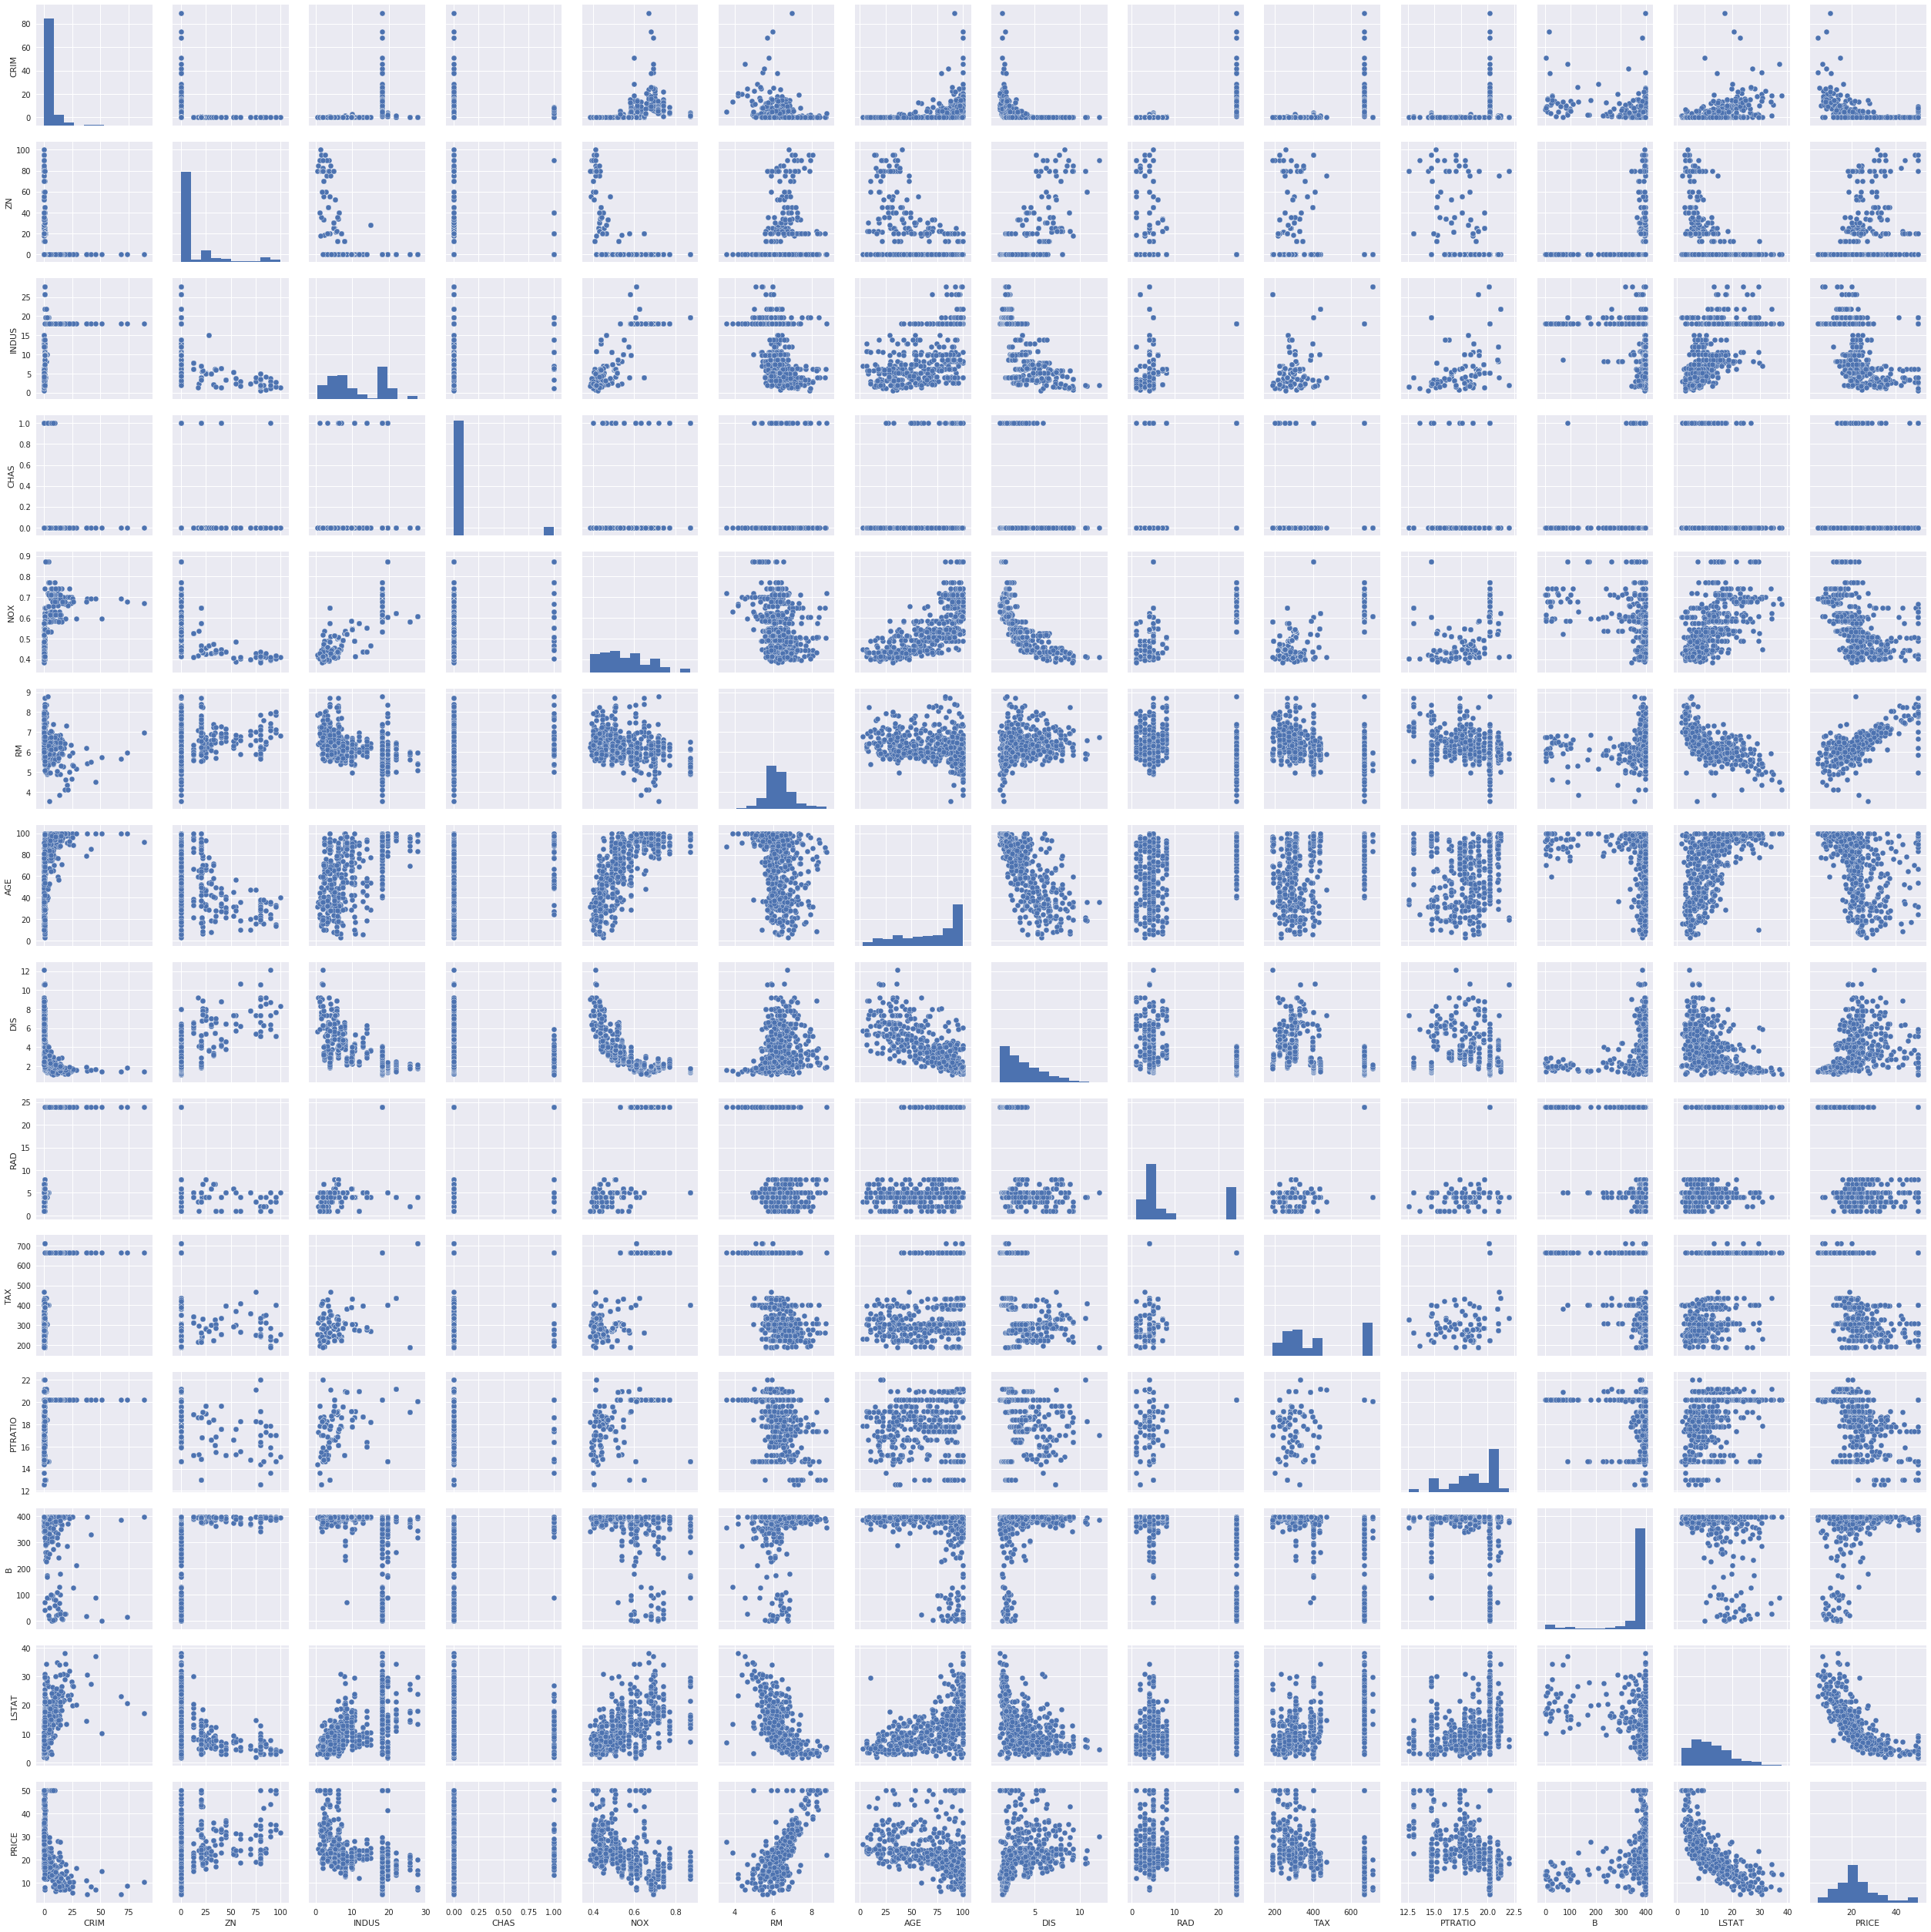

In [7]:
sns.pairplot(boston_df)

In [8]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


## train and test

In [9]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
coef = reg.coef_
intercept = reg.intercept_
print("intercept:", intercept)
print("coefficent:", coef)

intercept: 31.682148582135596
coefficent: [-1.32774155e-01  3.57812335e-02  4.99454423e-02  3.12127706e+00
 -1.54698463e+01  4.04872721e+00 -1.07515901e-02 -1.38699758e+00
  2.42353741e-01 -8.69095363e-03 -9.11917342e-01  1.19435253e-02
 -5.48080157e-01]


In [11]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)
print('R^2 =', reg.score(X_test, y_test))

MSE = 21.540218943931777
R^2 = 0.7109203586326271


## if Simple Linear Regresion

In [12]:
X = boston.data[:,[5]]
y = boston.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(354, 1)
(152, 1)


In [14]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
coef = reg.coef_
intercept = reg.intercept_
print("intercept:", intercept)
print("coefficent:", coef)
print('y:Scores = {} * X + {}'.format(coef, intercept))

intercept: -34.662307438406785
coefficent: [9.1181022]
y:Scores = [9.1181022] * X + -34.662307438406785


In [17]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)
print('R^2 =', reg.score(X_test, y_test))

MSE = 40.35144969787305
R^2 = 0.4584649934303068


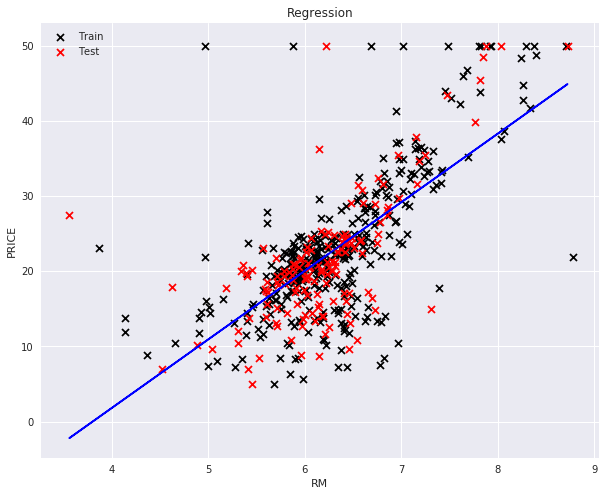

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X_train, y_train, marker='x', color='black', label='Train')
plt.scatter(X_test, y_test, marker='x', color='red', label='Test')
plt.plot(X_test, y_pred, color='blue')
plt.title('Regression')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.legend()